## Data Analysis on GDP and life expectancy from the World Health Organization and the World Bank


**Goal**: to analyze data on GDP and life expectancy from the World Health Organization and the World Bank. 

**Purpose**: 
- to try and identify the relationship between the GDP and life expectancy of six countries during different years;
- to compare countries from a dataset.

**Data**: Dataset provided by codecademy.com for learning purposes.

**Main insrtruments**: Data Visulization through Matplotlib and Seaborn

In [100]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

First, we need to take a look at how our dataset lks like.

In [101]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [102]:
#  to check that we also have different countries
df.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


Second, let's dive a little deeper into dataset, understand our variables and datatypes. 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [104]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


So we are dealing with a pre-cleaned dataset, meaning that we don't have missing or null values and the data is in analysis-ready state.

**Variables** we have:

- *Country* - categorical nominal, indicating nation
- *Year* - numerical discrete, indicating the year for the observation
- *Life expectancy at birth (years)* - numerical continuous, indicating life expectancy value in years
- *GDP* - numerical continuous, indicating Gross Domestic Product in U.S. dollars

This classification just gives us a small tip on what methods we can choose to analyze this dataset. The inication of data was provided by codecademy.com

**Questions that arise at a first glance:**

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

More Resources:

The National Institute of Standards and Technology’s (NIST) EDA Introduction.

**I. Has life expectancy increased over time in the six nations?**

<span style="color:orange">*Life expectancy at birth*</span> is defined as how long, on average, a newborn can expect to live, if current death rates do not change. Gains in life expectancy at birth can be attributed to a number of factors, including rising living standards, improved lifestyle and better education, as well as greater access to quality health services [[source](https://data.oecd.org/healthstat/life-expectancy-at-birth.htm)]. One of these factors is also GDP, we will take a look at it in the next question.

Let's first take a look at each country separately to see the individual patterns and then at all six together. Since we we have a continuous variable, that changes over time, line graph suits us in this question. 

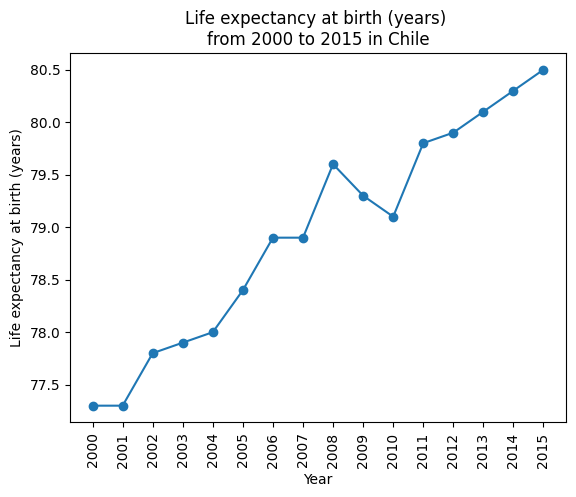

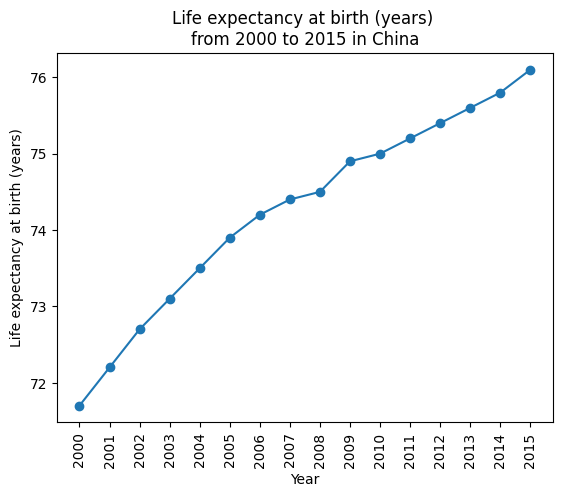

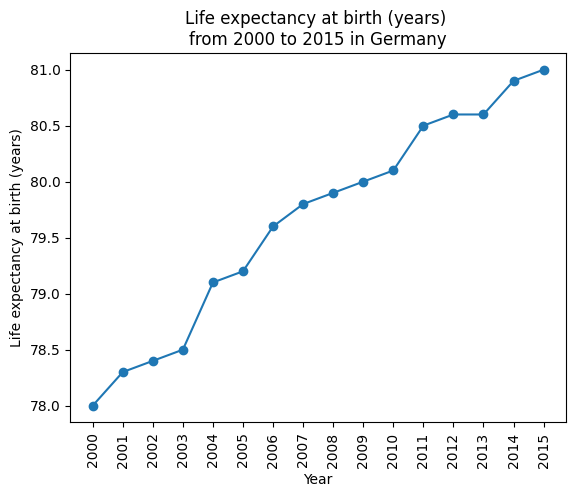

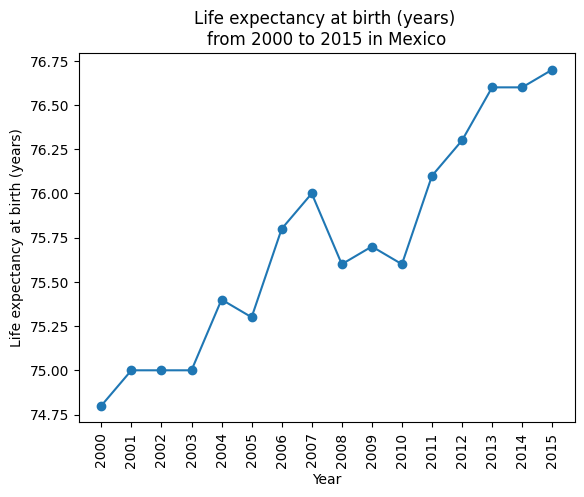

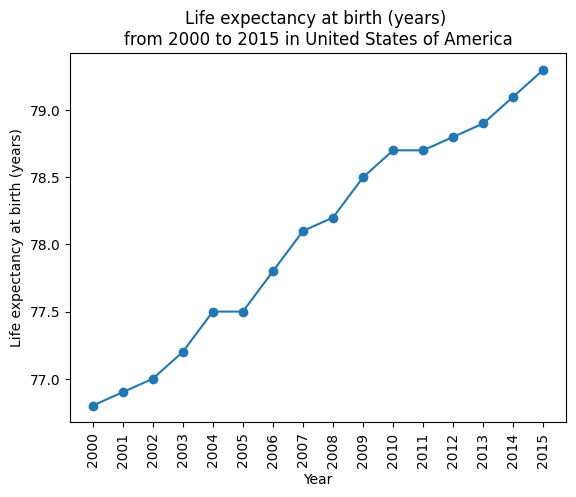

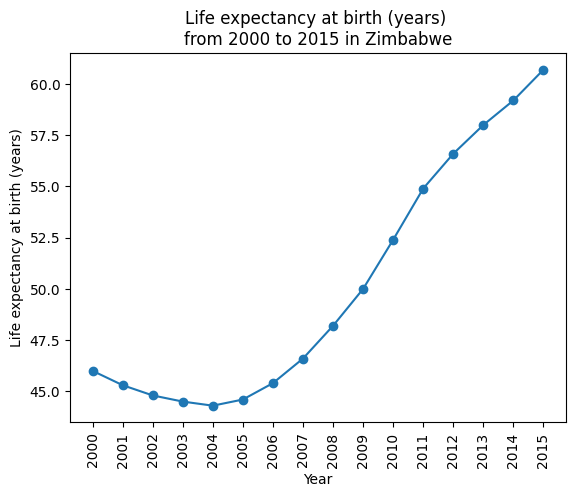

<Figure size 640x480 with 0 Axes>

In [105]:
# to form a list of countries we have
countries = df["Country"].unique()
years = df["Year"].unique()

for country in countries:
    sub_df = df[df["Country"] == country]
    ax = plt.subplot()
    plt.plot(range(len(years)), sub_df["Life expectancy at birth (years)"], marker='o')
    plt.xticks(rotation=90, fontsize=10)
    plt.xlabel('Year')
    ax.set_xticks(range(years))
    ax.set_xticklabels(years)
    plt.ylabel('Life expectancy at birth (years)')
    plt.title(f"Life expectancy at birth (years) \nfrom 2000 to 2015 in {country}")

    plt.show()
    plt.clf()


The above line graphs represent the Life expectancy at birth in years in 6 different countries between 2000 and 2015. 
 In general, we see the trend of life expectancy growth across all given countries. So, we can answer yes to our first question, life expectancy did increase over time in the six nations. 
 
 But while in *the USA*, *China* and *Germany* there is a gentle increase each year with minor fluctuations, 
there are some graphically noticeable interesting moments in other countries:
- in *Chile* 2008-2010 period shows slight decline from 79,6 to 79,1. Possible reasons: the international financial crisis in 2009, Chile Earthquake in 2010;
- in *Mexico* some rapid changes: 2001-2003 plato period, slight fall in 2005, 2007-2010 drop. Posible reasons: the country is periodically influenced by Hurricanes, Cartel businesses, the international financial crisis in 2009, flu pandemic in 2009, the Cartel Wars in 2010;
- in *Zimbabwe* the down slide period from 2000 hitting the lowest point of 44.3 in 2004 and gradual increase in next 11 yearss to the point of 60.7. Possible reasons: political and economic upheaval and worsening economic and human rights conditions, farm seizures, food crisis in 2000s.

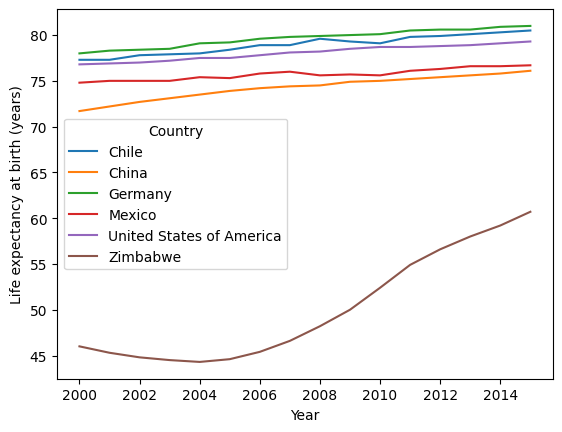

In [106]:
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country", markers='o')
plt.show()

As can be seen from the line plot above, the most outstanding country in both the graph shape and extremely low values of Life expectancy (despite the overall growth) is Zimbabwe graph. 
Other countries lines show slight increase of 2 to 4 years in life expectancy during 2000-2015 period, all in 71-81 years window. Germany, Chile and the USA hold the top-3 values of life expectancy according to the graph. 

**II. Has GDP increased over time in the six nations?**

<span style="color:orange">*Gross domestic product*</span> or <span style="color:orange">*GDP*</span> is a measure of the size and health of a country’s economy over a period of time (usually one quarter or one year). It is also used to compare the size of different economies at a different point in time [[source](https://www.bankofengland.co.uk/explainers/what-is-gdp)].

Let's first take a look at each country separately to see the individual patterns and then at all six together. Since we we have a continuous variable, that changes over time, line graph suits us in this question. 

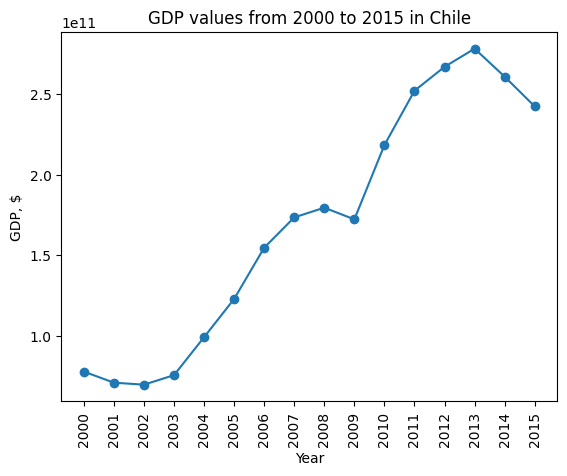

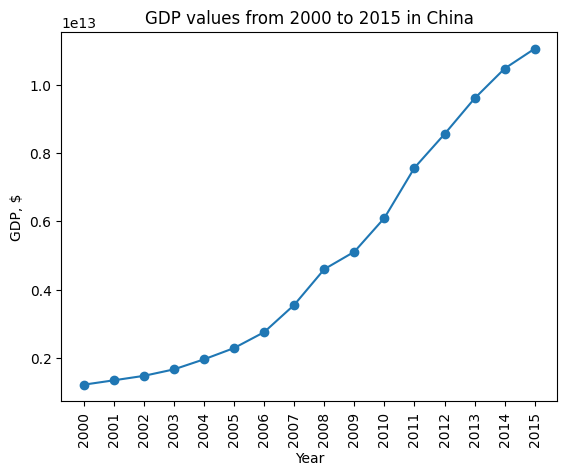

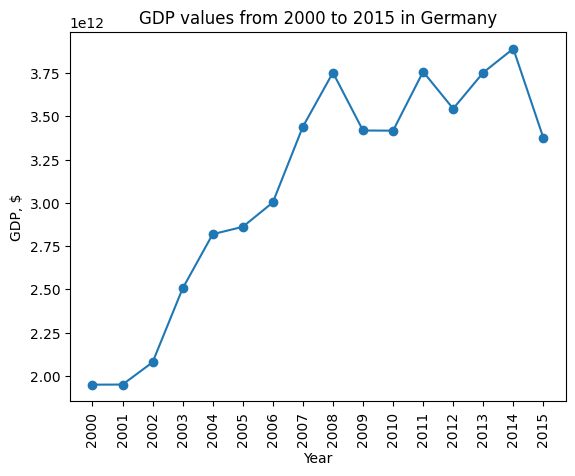

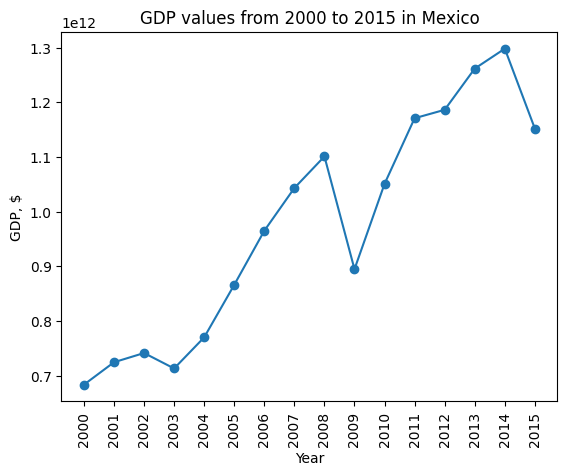

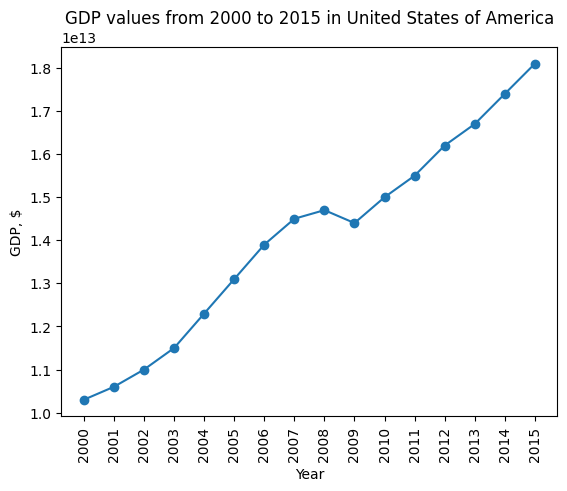

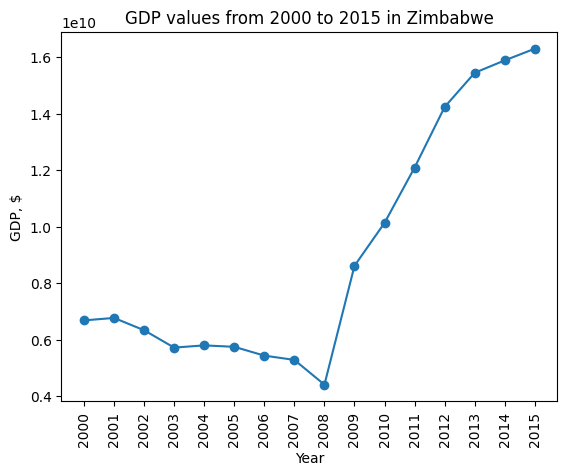

<Figure size 640x480 with 0 Axes>

In [117]:
for country in countries:
    sub_df = df[df["Country"] == country]
    ax = plt.subplot()
    plt.plot(range(len(years)), sub_df["GDP"], marker='o')
    plt.xticks(rotation=90, fontsize=10)
    plt.xlabel('Year')
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years)
    plt.ylabel('GDP, $')
    plt.title(f"GDP values from 2000 to 2015 in {country}")

    plt.show()
    plt.clf()

GDP line graphs reveal how different those 6 countries are, but, of course, some similarities also can be found.

For example, The USA, Germany, Mexico and Chile all show drops in 2008-2009 period (probably as a result of world financial crisis in 2008-2009). China has not got a drop, but a slowdown in the same time. Zimbabwe's GDP doesn't seem to have a decrease in 2009 particulalrly, but has it's lowest point in 2008, where possible reasons can be not only world financial crisis, but a peak of continuous economical and political internal crisis in a country. 
In terms of similarities, it could be noticed that only 2 countries, the USA and China have continuous rise in GDP, regardless of 2008-2009 period. 

Individually: 
- Chile: the overall growth can be noted, with lowest point in 2002 and highest peak in 2013, and fall after it;
- China: gradual increase during the whole period, with no drops;
- Germany: gradual increase until 2008, and continuous oscillations after it;
- Mexico: growth with noticable drops in 2002-2003, 2008-2009, highest point in 2014 with drop after;
- the USA: gradual growth with only drop due to 2008 financial crisis;
- Zimbabwe: continuous decrease hitting the lowest point in 2008 and considerable rise to the highest point in 2015



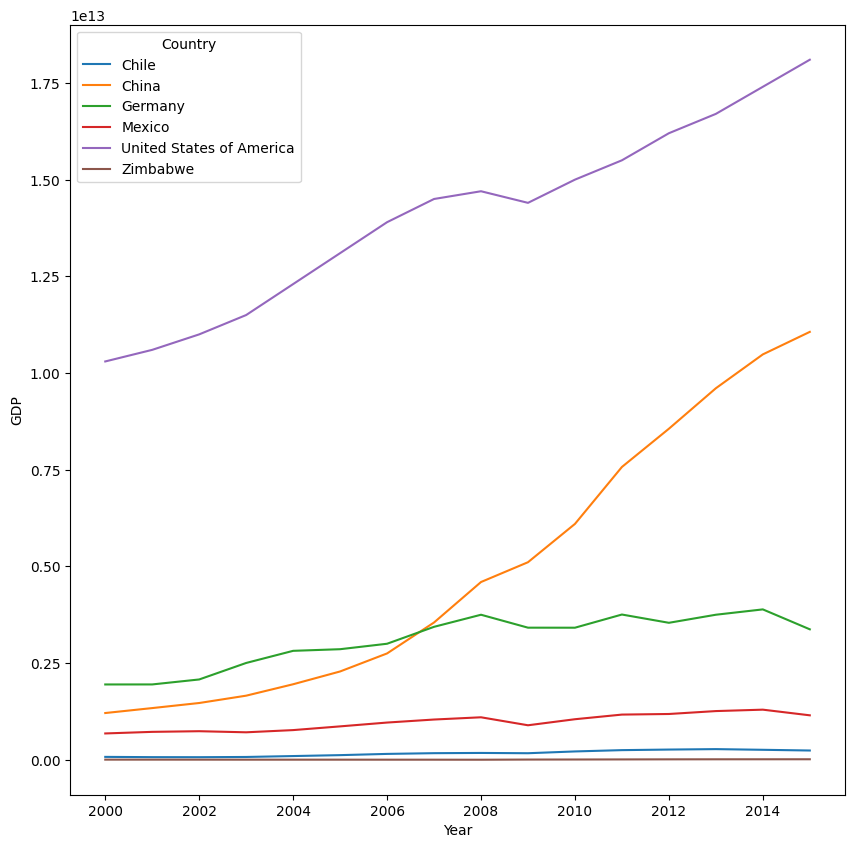

In [118]:

fig = plt.figure(figsize=(10, 10))
sns.lineplot(data=df, x="Year", y="GDP", hue="Country")
plt.show()

Chile and Zimbabwe started almost at the same level in 2000 and have comparable results in 2015. 
The USA is leading with noticable growth, China starts from a 3rd place after Germany 2000, taking the 2nd in 2015.
Not very ticable changes in Germany and Mexico. 

**III. - Is there a correlation between GDP and life expectancy of a country?**

As we are comparing 2 numerical continious variables, we can use a scatter plot. As GDP seems to be a predictor of life expectancy, let's place it on the x-axis, and life expectancy on y-axis.
Just like in 2 previous questins, let's analyze each country individually and then all together. 

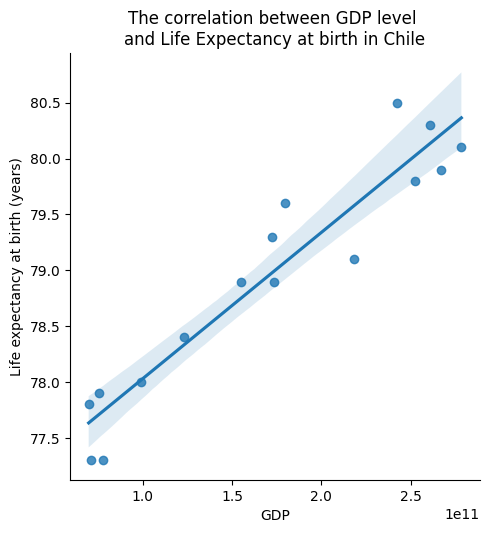

<Figure size 640x480 with 0 Axes>

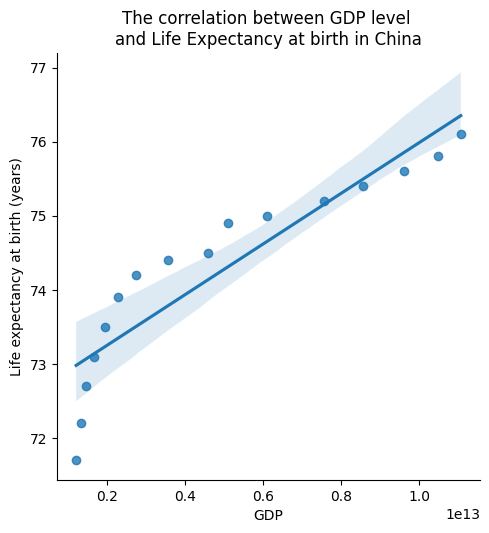

<Figure size 640x480 with 0 Axes>

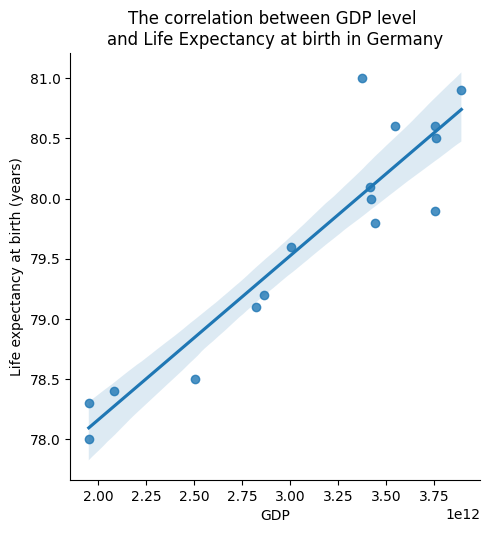

<Figure size 640x480 with 0 Axes>

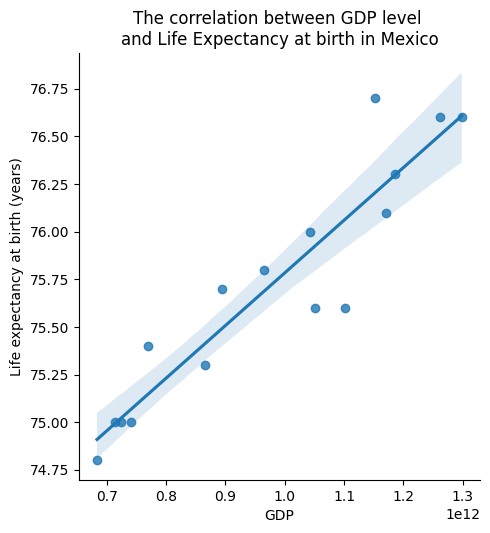

<Figure size 640x480 with 0 Axes>

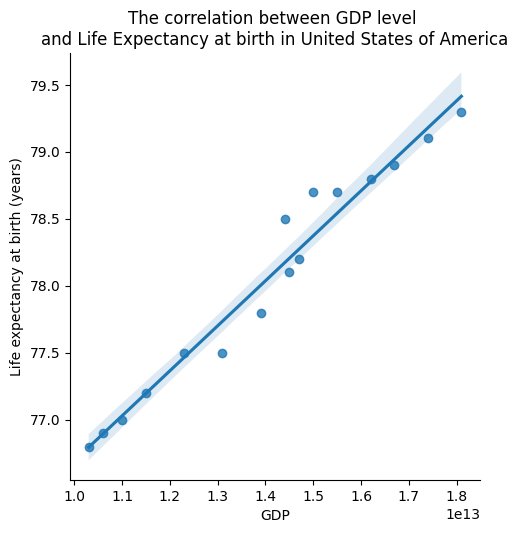

<Figure size 640x480 with 0 Axes>

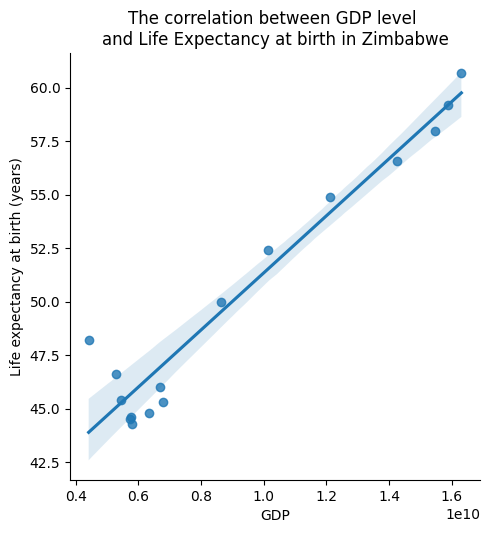

<Figure size 640x480 with 0 Axes>

In [131]:
for country in countries:
    sub_df = df[df["Country"] == country]
    sns.lmplot(x = 'GDP', y="Life expectancy at birth (years)", data = sub_df)
    
    plt.title(f"The correlation between GDP level \nand Life Expectancy at birth in {country}")

    plt.show()
    plt.clf()

According to the above scatterplots, there are a correlation patterns between GDP and Life Expectancy in all 6 countries. There is also a regression line on every plot, showing the direction of this correlation (positive for all countries, higher value of GDP corresponds to higher value of life expectancy). 

We can also use **Pearson Correlation** to measure the strengths of linear relationships we see above.

(**Pearson Correlation** (often referred to simply as “correlation”) is a scaled form of covariance. It measures the strength of a linear relationship, ranges from -1 to +1. 

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.)

There is *pearsonr* function in Python, which is part of the scipy.stats module, that calculates the Pearson correlation coefficient and the p-value for testing non-correlation. 

In [140]:
from scipy.stats import pearsonr
print("The correlation coefficients between GDP and life expectancy for countries in the dataset: ")
for country in countries:
    sub_df = df[df["Country"] == country]
    corr, p = pearsonr(sub_df['GDP'], sub_df['Life expectancy at birth (years)'])
    print(f"{country} - {corr}, p-value = {p}")

The correlation values between GDP and life expectancy equals for different  
Chile - 0.9498766659254416,  p-value = 1.8659139746585318e-08
China - 0.9085255408648356,  p-value = 1.125098572070083e-06
Germany - 0.9326988982561268,  p-value = 1.4018815534045914e-07
Mexico - 0.9322377167847082,  p-value = 1.4686960248304974e-07
United States of America - 0.9817092382430257,  p-value = 1.749970926909946e-11
Zimbabwe - 0.9661998955858778,  p-value = 1.2358516366845632e-09


By seeing these huge correlation coefficients and these tiny p-values, we may say that, the correlation is obvious, it's positive (which can also be noted from a scatterplot anyway) and very strong. However, we must take into account that in this case we have only 16 pairs of values in our sample (1 GDP-Life expectancy pair per year), which is extremely small for a sample and can mislead us. It's fair to say, that we cannot trust these results. 
(But in this project it is used more in learning purposes).

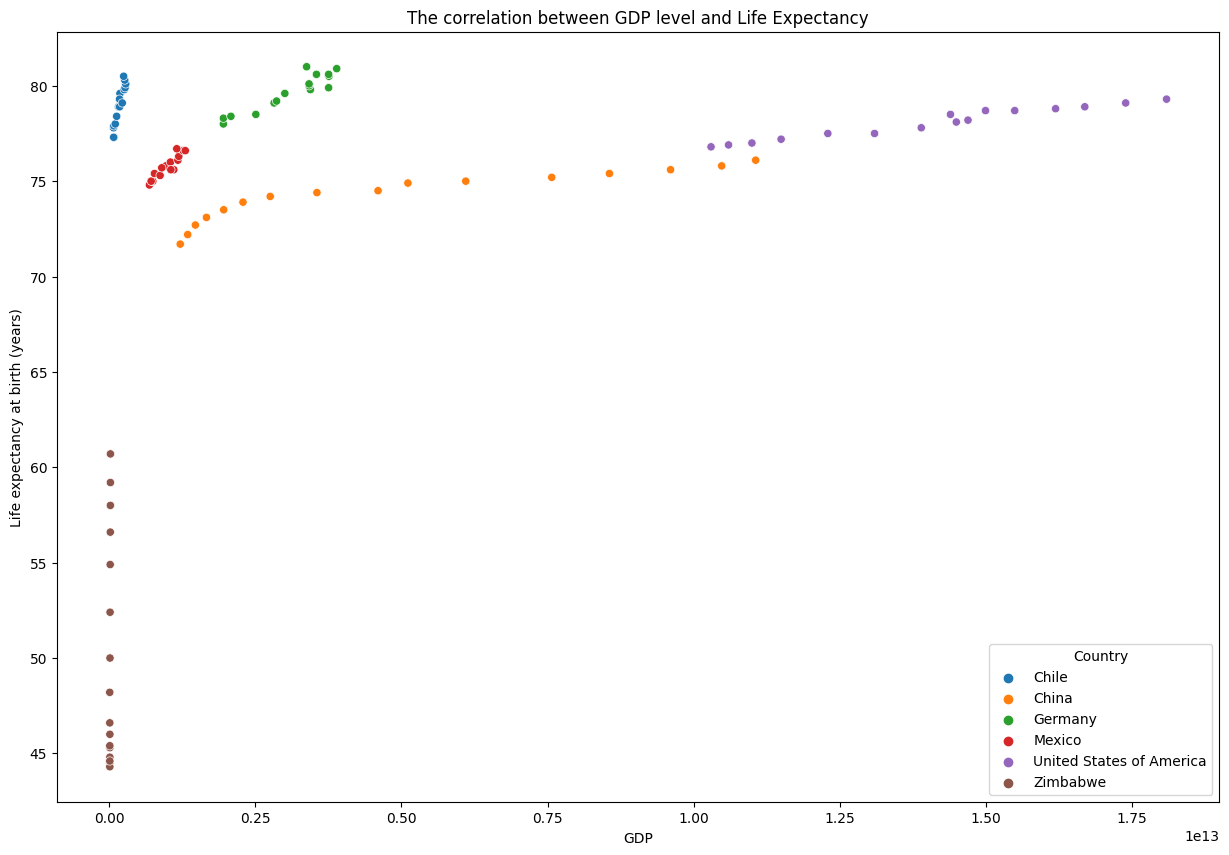

<Figure size 640x480 with 0 Axes>

In [141]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'GDP', y="Life expectancy at birth (years)", hue = 'Country', data = df)

plt.title(f"The correlation between GDP level and Life Expectancy")

plt.show()
plt.clf()

On a combined graph we can see how different those countries are.

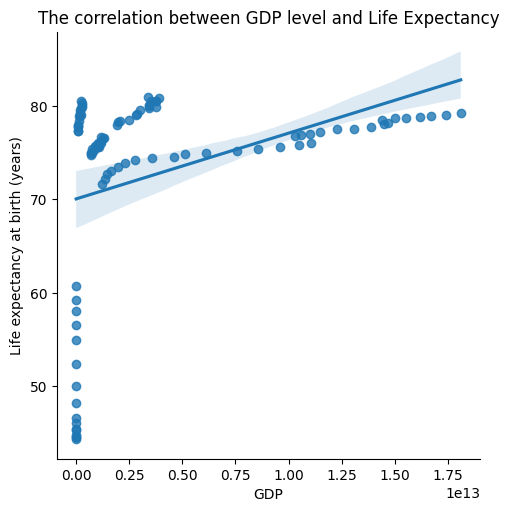

<Figure size 640x480 with 0 Axes>

In [142]:
# to show the average trend
sns.lmplot(data=df, x="GDP", y="Life expectancy at birth (years)")   
plt.title(f"The correlation between GDP level and Life Expectancy")
plt.show()
plt.clf()

In [145]:
corr, p = pearsonr(df['GDP'], df['Life expectancy at birth (years)'])
print(f"The correlation coefficient between GDP and life expectancy for the dataset in total equals {corr}, p-value = {p}")

The correlation value between GDP and life expectancy for the dataset in total equals 0.343206748449156, p-value = 0.0006187129569469888


This time we have a bigger sample, however a very high variation of our values, which also affects the final results. But previous results were linked to individual countries, while these represent the correlation for 6 nations in total. While small p-value confirms that correlation exists, the correlation coefficient itself shows that it is not as strong for each country alone, but it exists and it is positive.